# Hamming weight and Pearson Correlation

This notebook demonstrates how to guess a floating number using Hamming Weight model.


We generate a random secret floating number. Then we use hamming weight model to guess the number.

We develop a method of devide-and-conquer to quickly arrive to the close number with a defined precision.

## Guessing...

In [1]:
import struct
import numpy as np
import pandas as pd
import random

def float_to_bin(num):
    bits, = struct.unpack('!I', struct.pack('!f', num))
    return "{:032b}".format(bits)

def hamming_weight(num):
    return float_to_bin(num).count('1')

In [2]:
def compute_corr(secret_number, guess_range, number_tests, known_inputs):
        low, high = guess_range
        guess_val = np.arange(low, high, (high-low)/number_tests)
        hw = pd.DataFrame(columns=guess_val, data=known_inputs.reshape(-1, 1) * guess_val)
        hw['actual'] = known_inputs * secret_number
        corr = hw.applymap(lambda x: hamming_weight(x)).corr(method='pearson')
        c = corr.drop('actual', axis=0)['actual']
        return c.mean()


def guess_number_range(secret_number, guess_range, prescision, number_tests, known_inputs):
    n_cycles = 0
    while (guess_range[1] - guess_range[0]) > prescision:
        n_cycles = n_cycles + 1
        print('***[%d] guess_range =' % n_cycles, guess_range)
        range_middle_value = (guess_range[1] + guess_range[0]) / 2.0
        sub_ranges = [(guess_range[0], range_middle_value), (range_middle_value, guess_range[1])]
        low_corr = compute_corr(secret_number, sub_ranges[0], number_tests, known_inputs)
        high_corr = compute_corr(secret_number, sub_ranges[1], number_tests, known_inputs)
        
        print('low_corr =', low_corr,', high_corr =', high_corr)
        if low_corr > high_corr:
            guess_range = sub_ranges[0]
        else:
            guess_range = sub_ranges[1]
    return guess_range

## Test single point

In [3]:
#
# initalize parameter and generate a random number (secret number)
number_tests = 20
known_inputs = np.random.uniform(-1e0, 1e0, 10000) * 1e2
guess_range = (-3, 3)
secret_number = random.uniform(guess_range[0], guess_range[1])
prescision = 1e-5
guess_range = guess_number_range(secret_number, guess_range, prescision, number_tests, known_inputs)

***[1] guess_range = (-3, 3)
low_corr = -0.015202502214824803 , high_corr = 0.06148852741316667
***[2] guess_range = (0.0, 3)
low_corr = 0.07759162708477349 , high_corr = 0.037461348843598356
***[3] guess_range = (0.0, 1.5)
low_corr = 0.11735597734724419 , high_corr = 0.030078825649331543
***[4] guess_range = (0.0, 0.75)
low_corr = 0.1634064880765548 , high_corr = 0.06296200912826408
***[5] guess_range = (0.0, 0.375)
low_corr = 0.16923876198308965 , high_corr = 0.15296110854461037
***[6] guess_range = (0.0, 0.1875)
low_corr = 0.07285835390603987 , high_corr = 0.262210169886318
***[7] guess_range = (0.09375, 0.1875)
low_corr = 0.21742052108121857 , high_corr = 0.3096650188790283
***[8] guess_range = (0.140625, 0.1875)
low_corr = 0.33842125525041744 , high_corr = 0.281875976463967
***[9] guess_range = (0.140625, 0.1640625)
low_corr = 0.3003497526820972 , high_corr = 0.3771542241626199
***[10] guess_range = (0.15234375, 0.1640625)
low_corr = 0.35312709710493057 , high_corr = 0.40237937595

In [4]:
print('the secret number =', secret_number)
guessed_number = (guess_range[1] + guess_range[0]) / 2.0
print('the guessed number =', guessed_number)
error_rate = abs((guessed_number - secret_number) / secret_number) * 100
print('error rate = %0.4f' % error_rate, '%')

the secret number = 0.16033411882116777
the guessed number = 0.16033458709716797
error rate = 0.0003 %


## Test multiple points

In [5]:
# initialize
guess_range = (-3, 3.0)
prescision = 1e-5
number_tests = 10

secret_numbers = np.sort(np.random.uniform(guess_range[0], guess_range[1], 50))
known_inputs = np.random.uniform(-1.0, 1.0, 1000) * 1e2

results = pd.Series(index=secret_numbers, name='guessed_numbers', dtype=np.float32)
for idx in results.index:
    grange = guess_number_range(idx, guess_range, prescision, number_tests, known_inputs)
    results[idx] = (grange[1] + grange[0]) / 2.0

***[1] guess_range = (-3, 3.0)
low_corr = 0.07405023124080619 , high_corr = -0.05661528559736577
***[2] guess_range = (-3, 0.0)
low_corr = 0.1067456165702231 , high_corr = 0.04814867568332307
***[3] guess_range = (-3, -1.5)
low_corr = 0.11443112975542928 , high_corr = 0.07523334333270751
***[4] guess_range = (-3, -2.25)
low_corr = 0.14470201513915087 , high_corr = 0.08260418423438062
***[5] guess_range = (-3, -2.625)
low_corr = 0.191555149657685 , high_corr = 0.10413045849879414
***[6] guess_range = (-3, -2.8125)
low_corr = 0.1579084206383234 , high_corr = 0.20958645042766805
***[7] guess_range = (-2.90625, -2.8125)
low_corr = 0.26993781775144654 , high_corr = 0.15736458716638418
***[8] guess_range = (-2.90625, -2.859375)
low_corr = 0.25669251129494863 , high_corr = 0.26758493151509266
***[9] guess_range = (-2.8828125, -2.859375)
low_corr = 0.30888377143859397 , high_corr = 0.21834376503365274
***[10] guess_range = (-2.8828125, -2.87109375)
low_corr = 0.3601312794456171 , high_corr = 0

low_corr = 0.38132053897664653 , high_corr = 0.34614974524327
***[16] guess_range = (-2.578125, -2.57794189453125)
low_corr = 0.3895085043063828 , high_corr = 0.36777536872691
***[17] guess_range = (-2.578125, -2.578033447265625)
low_corr = 0.397008745138318 , high_corr = 0.3777750401241146
***[18] guess_range = (-2.578125, -2.5780792236328125)
low_corr = 0.4085730725278002 , high_corr = 0.3797009569276436
***[19] guess_range = (-2.578125, -2.5781021118164062)
low_corr = 0.4054072327354595 , high_corr = 0.4013244844493705
***[20] guess_range = (-2.578125, -2.578113555908203)
low_corr = 0.3890710267123452 , high_corr = 0.40982470535226473
***[1] guess_range = (-3, 3.0)
low_corr = 0.07088307552642546 , high_corr = -0.01727919565828605
***[2] guess_range = (-3, 0.0)
low_corr = 0.08327981934889213 , high_corr = 0.04337767840996732
***[3] guess_range = (-3, -1.5)
low_corr = 0.09909945170773396 , high_corr = 0.06366074236096673
***[4] guess_range = (-3, -2.25)
low_corr = 0.07529634779527075 

low_corr = 0.3411282562248207 , high_corr = 0.24015832939402865
***[11] guess_range = (-2.00390625, -1.998046875)
low_corr = 0.34081595569422657 , high_corr = 0.3449200855165516
***[12] guess_range = (-2.0009765625, -1.998046875)
low_corr = 0.37354179652430985 , high_corr = 0.2937571941582625
***[13] guess_range = (-2.0009765625, -1.99951171875)
low_corr = 0.42856768637398945 , high_corr = 0.3127284589852407
***[14] guess_range = (-2.0009765625, -2.000244140625)
low_corr = 0.47240922417495934 , high_corr = 0.38664148088093464
***[15] guess_range = (-2.0009765625, -2.0006103515625)
low_corr = 0.5215620216266811 , high_corr = 0.4085459524458351
***[16] guess_range = (-2.0009765625, -2.00079345703125)
low_corr = 0.5689485969484873 , high_corr = 0.4647417378292088
***[17] guess_range = (-2.0009765625, -2.000885009765625)
low_corr = 0.6029470385558178 , high_corr = 0.5451450696299884
***[18] guess_range = (-2.0009765625, -2.0009307861328125)
low_corr = 0.5633816036335708 , high_corr = 0.641

low_corr = 0.1806502772843786 , high_corr = 0.12920800707465105
***[8] guess_range = (-1.125, -1.078125)
low_corr = 0.1978568227114543 , high_corr = 0.1537152816165472
***[9] guess_range = (-1.125, -1.1015625)
low_corr = 0.21504040530647375 , high_corr = 0.1660335286005475
***[10] guess_range = (-1.125, -1.11328125)
low_corr = 0.23775105593425283 , high_corr = 0.17605446355113918
***[11] guess_range = (-1.125, -1.119140625)
low_corr = 0.2617326694240715 , high_corr = 0.20791099659779952
***[12] guess_range = (-1.125, -1.1220703125)
low_corr = 0.27091596852996436 , high_corr = 0.2379091501183015
***[13] guess_range = (-1.125, -1.12353515625)
low_corr = 0.29357999429603343 , high_corr = 0.2565969042015282
***[14] guess_range = (-1.125, -1.124267578125)
low_corr = 0.3167547640020232 , high_corr = 0.24794888121167108
***[15] guess_range = (-1.125, -1.1246337890625)
low_corr = 0.32692494157808927 , high_corr = 0.2973260074459766
***[16] guess_range = (-1.125, -1.12481689453125)
low_corr = 0

low_corr = 0.04899935985630556 , high_corr = -0.0501619713776809
***[2] guess_range = (-3, 0.0)
low_corr = 0.03143589887034725 , high_corr = 0.05675551259369407
***[3] guess_range = (-1.5, 0.0)
low_corr = 0.06529327709613947 , high_corr = 0.04444155759088168
***[4] guess_range = (-1.5, -0.75)
low_corr = 0.04400207692211013 , high_corr = 0.10209067827406149
***[5] guess_range = (-1.125, -0.75)
low_corr = 0.0740861603504305 , high_corr = 0.12948448907833998
***[6] guess_range = (-0.9375, -0.75)
low_corr = 0.16532293068891177 , high_corr = 0.12575702908483527
***[7] guess_range = (-0.9375, -0.84375)
low_corr = 0.12914921891399547 , high_corr = 0.20869785149644554
***[8] guess_range = (-0.890625, -0.84375)
low_corr = 0.18508975644936423 , high_corr = 0.2525510772397965
***[9] guess_range = (-0.8671875, -0.84375)
low_corr = 0.29484576376695365 , high_corr = 0.2315576726026042
***[10] guess_range = (-0.8671875, -0.85546875)
low_corr = 0.2521948270942485 , high_corr = 0.3423420822956599
***[1

low_corr = 0.6515731690665134 , high_corr = 0.5573858293462548
***[19] guess_range = (-0.64727783203125, -0.6472549438476562)
low_corr = 0.6651806887161752 , high_corr = 0.6182897438915054
***[20] guess_range = (-0.64727783203125, -0.6472663879394531)
low_corr = 0.6081208967927154 , high_corr = 0.7182148190451005
***[1] guess_range = (-3, 3.0)
low_corr = 0.0811132081608393 , high_corr = -0.016327664839024026
***[2] guess_range = (-3, 0.0)
low_corr = 0.048889417144298786 , high_corr = 0.09639105836205385
***[3] guess_range = (-1.5, 0.0)
low_corr = 0.05635952102871859 , high_corr = 0.11292613797638185
***[4] guess_range = (-0.75, 0.0)
low_corr = 0.13671752138052462 , high_corr = 0.0818312171662287
***[5] guess_range = (-0.75, -0.375)
low_corr = 0.15149991223031195 , high_corr = 0.1315595918494138
***[6] guess_range = (-0.75, -0.5625)
low_corr = 0.11040052675343796 , high_corr = 0.2020237820586433
***[7] guess_range = (-0.65625, -0.5625)
low_corr = 0.23210957949741343 , high_corr = 0.1767

low_corr = 0.5167141887176311 , high_corr = 0.45863311605969537
***[16] guess_range = (-0.468017578125, -0.46783447265625)
low_corr = 0.4945473975956377 , high_corr = 0.5386726976038909
***[17] guess_range = (-0.467926025390625, -0.46783447265625)
low_corr = 0.5745355904926451 , high_corr = 0.5148955710997868
***[18] guess_range = (-0.467926025390625, -0.4678802490234375)
low_corr = 0.5407307542430215 , high_corr = 0.6215887750688026
***[19] guess_range = (-0.46790313720703125, -0.4678802490234375)
low_corr = 0.5844908636203576 , high_corr = 0.6896171583974512
***[20] guess_range = (-0.4678916931152344, -0.4678802490234375)
low_corr = 0.6727510651389706 , high_corr = 0.6852363639172743
***[1] guess_range = (-3, 3.0)
low_corr = 0.056013590849773184 , high_corr = -0.034553480685281475
***[2] guess_range = (-3, 0.0)
low_corr = 0.022063878943352773 , high_corr = 0.07838742853292904
***[3] guess_range = (-1.5, 0.0)
low_corr = 0.02382784647200225 , high_corr = 0.11037401961365567
***[4] gues

low_corr = 0.2735672551853917 , high_corr = 0.41811018873782013
***[10] guess_range = (-0.05859375, -0.046875)
low_corr = 0.37269590710379524 , high_corr = 0.46427809035764395
***[11] guess_range = (-0.052734375, -0.046875)
low_corr = 0.42922209407822604 , high_corr = 0.5157752595802065
***[12] guess_range = (-0.0498046875, -0.046875)
low_corr = 0.49074231977945104 , high_corr = 0.5398191640879225
***[13] guess_range = (-0.04833984375, -0.046875)
low_corr = 0.5362608238632298 , high_corr = 0.5463640999851653
***[14] guess_range = (-0.047607421875, -0.046875)
low_corr = 0.5488837190532017 , high_corr = 0.5441803318950713
***[15] guess_range = (-0.047607421875, -0.0472412109375)
low_corr = 0.5435828787236142 , high_corr = 0.5551397123779194
***[16] guess_range = (-0.04742431640625, -0.0472412109375)
low_corr = 0.5506437369980782 , high_corr = 0.5514238196449861
***[17] guess_range = (-0.047332763671875, -0.0472412109375)
low_corr = 0.5568962819537321 , high_corr = 0.547766010561505
***[1

low_corr = 0.18506212242734182 , high_corr = 0.10388755914883518
***[8] guess_range = (0.84375, 0.890625)
low_corr = 0.20471125671245924 , high_corr = 0.1747337556511011
***[9] guess_range = (0.84375, 0.8671875)
low_corr = 0.21549437341214128 , high_corr = 0.17170688543662016
***[10] guess_range = (0.84375, 0.85546875)
low_corr = 0.22797752070227134 , high_corr = 0.19770237360223397
***[11] guess_range = (0.84375, 0.849609375)
low_corr = 0.22701859071765895 , high_corr = 0.2210206865521446
***[12] guess_range = (0.84375, 0.8466796875)
low_corr = 0.2274908641062857 , high_corr = 0.21431669213465118
***[13] guess_range = (0.84375, 0.84521484375)
low_corr = 0.23707824063854713 , high_corr = 0.20972125348432386
***[14] guess_range = (0.84375, 0.844482421875)
low_corr = 0.24515178563148515 , high_corr = 0.22053882988689835
***[15] guess_range = (0.84375, 0.8441162109375)
low_corr = 0.22828454687416203 , high_corr = 0.2395992617892122
***[16] guess_range = (0.84393310546875, 0.8441162109375)

low_corr = 0.0692625375770404 , high_corr = 0.13815477124547862
***[5] guess_range = (1.125, 1.5)
low_corr = 0.1710275019309812 , high_corr = 0.10619096935288577
***[6] guess_range = (1.125, 1.3125)
low_corr = 0.1440785515130152 , high_corr = 0.20328514109127854
***[7] guess_range = (1.21875, 1.3125)
low_corr = 0.1806460042525119 , high_corr = 0.22147250735080543
***[8] guess_range = (1.265625, 1.3125)
low_corr = 0.2669007097201418 , high_corr = 0.17806157033309894
***[9] guess_range = (1.265625, 1.2890625)
low_corr = 0.28218536398705846 , high_corr = 0.2648679809580436
***[10] guess_range = (1.265625, 1.27734375)
low_corr = 0.23858035165043884 , high_corr = 0.31926425352679855
***[11] guess_range = (1.271484375, 1.27734375)
low_corr = 0.26897580727124687 , high_corr = 0.37709340263008106
***[12] guess_range = (1.2744140625, 1.27734375)
low_corr = 0.33104766227641236 , high_corr = 0.412518049039203
***[13] guess_range = (1.27587890625, 1.27734375)
low_corr = 0.4623960015074802 , high_c

low_corr = -0.019904717278838628 , high_corr = 0.06706046224200973
***[2] guess_range = (0.0, 3.0)
low_corr = 0.051273261731485845 , high_corr = 0.07555042175251588
***[3] guess_range = (1.5, 3.0)
low_corr = 0.0991898825355682 , high_corr = 0.06789211300145505
***[4] guess_range = (1.5, 2.25)
low_corr = 0.14476233896608556 , high_corr = 0.057503355571937274
***[5] guess_range = (1.5, 1.875)
low_corr = 0.15891317634910634 , high_corr = 0.10533651936984045
***[6] guess_range = (1.5, 1.6875)
low_corr = 0.1160932882885618 , high_corr = 0.1868181588816823
***[7] guess_range = (1.59375, 1.6875)
low_corr = 0.2336587036406578 , high_corr = 0.1593609473834417
***[8] guess_range = (1.59375, 1.640625)
low_corr = 0.19426210023602963 , high_corr = 0.2502997583823758
***[9] guess_range = (1.6171875, 1.640625)
low_corr = 0.2793670854043303 , high_corr = 0.19368975755117723
***[10] guess_range = (1.6171875, 1.62890625)
low_corr = 0.3230400448542799 , high_corr = 0.21672833380007422
***[11] guess_range

low_corr = 0.5493769951821951 , high_corr = 0.6354297355719155
***[18] guess_range = (2.0661163330078125, 2.066162109375)
low_corr = 0.678869346041337 , high_corr = 0.5950249136104417
***[19] guess_range = (2.0661163330078125, 2.0661392211914062)
low_corr = 0.6461202309690999 , high_corr = 0.715953410518516
***[20] guess_range = (2.0661277770996094, 2.0661392211914062)
low_corr = 0.7618183331398088 , high_corr = 0.671689136013408
***[1] guess_range = (-3, 3.0)
low_corr = -0.036416759226938 , high_corr = 0.06510336920233939
***[2] guess_range = (0.0, 3.0)
low_corr = 0.046595444333765015 , high_corr = 0.09144850760258402
***[3] guess_range = (1.5, 3.0)
low_corr = 0.1085323637760582 , high_corr = 0.07285180734058863
***[4] guess_range = (1.5, 2.25)
low_corr = 0.07194562757942177 , high_corr = 0.1520022130035315
***[5] guess_range = (1.875, 2.25)
low_corr = 0.13297673167172197 , high_corr = 0.18594425525021152
***[6] guess_range = (2.0625, 2.25)
low_corr = 0.21623882376798628 , high_corr =

low_corr = 0.47025160539636923 , high_corr = 0.38288702648861983
***[14] guess_range = (2.31298828125, 2.313720703125)
low_corr = 0.5173810281600252 , high_corr = 0.42303012850391275
***[15] guess_range = (2.31298828125, 2.3133544921875)
low_corr = 0.557354539813133 , high_corr = 0.48747176085780997
***[16] guess_range = (2.31298828125, 2.31317138671875)
low_corr = 0.5109479654820026 , high_corr = 0.6059876368214304
***[17] guess_range = (2.313079833984375, 2.31317138671875)
low_corr = 0.6052108243333082 , high_corr = 0.611482695334413
***[18] guess_range = (2.3131256103515625, 2.31317138671875)
low_corr = 0.6484120751712646 , high_corr = 0.5497975391020016
***[19] guess_range = (2.3131256103515625, 2.3131484985351562)
low_corr = 0.6658981172664946 , high_corr = 0.6166903075513237
***[20] guess_range = (2.3131256103515625, 2.3131370544433594)
low_corr = 0.6840918580914214 , high_corr = 0.6402036304857144
***[1] guess_range = (-3, 3.0)
low_corr = -0.021101553123418996 , high_corr = 0.06

low_corr = 0.2833423318628948 , high_corr = 0.23218942773004342
***[10] guess_range = (2.859375, 2.87109375)
low_corr = 0.32188904855606515 , high_corr = 0.22993882700939414
***[11] guess_range = (2.859375, 2.865234375)
low_corr = 0.34763689896417893 , high_corr = 0.30357583282248085
***[12] guess_range = (2.859375, 2.8623046875)
low_corr = 0.3570378958511154 , high_corr = 0.32877943000106197
***[13] guess_range = (2.859375, 2.86083984375)
low_corr = 0.3581347074088891 , high_corr = 0.34808266241486857
***[14] guess_range = (2.859375, 2.860107421875)
low_corr = 0.3706349801172002 , high_corr = 0.3564607493678617
***[15] guess_range = (2.859375, 2.8597412109375)
low_corr = 0.3687772823765722 , high_corr = 0.3635075654834549
***[16] guess_range = (2.859375, 2.85955810546875)
low_corr = 0.37757810929443153 , high_corr = 0.36206221509604997
***[17] guess_range = (2.859375, 2.859466552734375)
low_corr = 0.375081353799474 , high_corr = 0.3795878576462952
***[18] guess_range = (2.859420776367

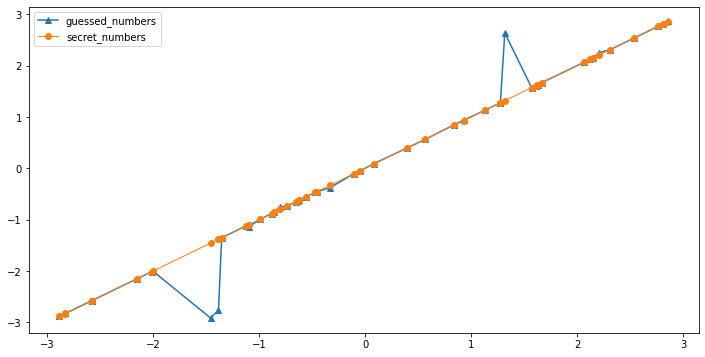

In [6]:
ax = results.plot(figsize = (12, 6), marker='^')
ax.plot(results.index, results.index, marker='o', linewidth=1, label='secret_numbers')
ax.legend()

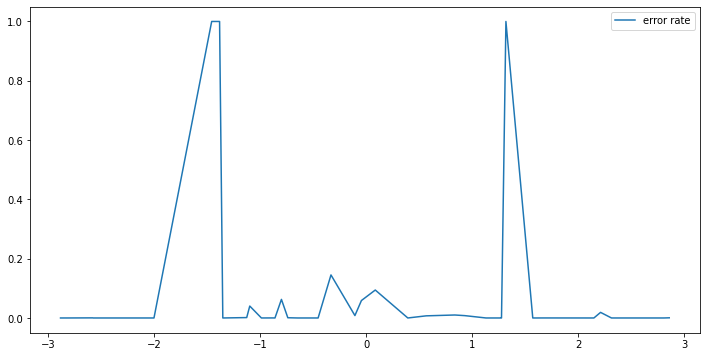

In [7]:
error_rate = ((results - results.index)/results.index).abs()
ax = error_rate.plot(figsize = (12, 6), label='error rate')
ax.legend()